<a href="https://colab.research.google.com/github/prasannarangam21/COVID-19-Radiography/blob/master/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.83 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-US;q=0.9,en-GB;q=0.8,en;q=0.7" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.1544602667.1598896344" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-data-sets/576013%2F1042828%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599935349&Signature=D66Fgi3oJ4WLI5Z1%2FJOnIDPllNCbrMesp9lN%2Bfrdu4puxjhyoTSLhKbpqXbWnwNHR3DrTD5jogdEBhYlur4LTl9EeqGzzX2xM%2FXDTq5I4h0EdUfwDG9AEQ2thtZgONGiV2g3PUCdMXp19aD4i0tRt2ITK8qULU2Q6WyqDn%2BSrL5iRM8g2KgfWbtJ%2BooXCxECAy9DZzFSE%2Fts8XnA%2B1mCuNdd96%2Fnztd7Iy4sMnnZWeqb8MkOAhtaIzBe5%2BhMeVkyW6WpnDPuWQhwODttQ8g5KK0aKgNhrX1rPbk7Tpcu3%2FRVl48%2Bf8tnrl8TY52FowqQXMUgYCghMCiID26pPfOQWQ%3D%3D" -c -O '576013_1042828_bundle_archive.zip'

--2020-09-09 21:15:36--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2020-09-09 21:15:36--  https://storage.googleapis.com/kaggle-data-sets/576013%2F1042828%2Fbundle%2Farchive.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1599935349&Signature=D66Fgi3oJ4WLI5Z1%2FJOnIDPllNCbrMesp9lN%2Bfrdu4puxjhyoTSLhKbpqXbWnwNHR3DrTD5jogdEBhYlur4LTl9EeqGzzX2xM%2FXDTq5I4h0EdUfwDG9AEQ2thtZgONGiV2g3PUCdMXp19aD4i0tRt2ITK8qULU2Q6WyqDn%2BSrL5iRM8g2KgfWbtJ%2BooXCxECAy9DZzFSE%2Fts8XnA%2B1mCuNdd96%2Fnztd7Iy4sMnnZWeqb8MkOAhtaIzBe5%2BhMeVkyW6WpnDPuWQhwODttQ8g5KK0aKgNhrX1rPbk7Tpcu3%2FRVl48%2Bf8tnrl8TY52FowqQXMUgYCghMCiID26pPfOQWQ%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123352595

In [2]:
!mkdir -p covid
!unzip /content/576013_1042828_bundle_archive.zip -d covid 

Archive:  /content/576013_1042828_bundle_archive.zip
  inflating: covid/COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: covid/COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  infla

In [3]:
%cd covid
!ls

/content/covid
'COVID-19 Radiography Database'


In [4]:
#@title

import pandas as pd
from pandas import plotting
import numpy as np
import cv2
import os
from tqdm import tqdm_notebook

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import tensorflow as tf
print("Using Tensorflow version: {}".format(tf.__version__))

Using Tensorflow version: 2.3.0


In [ ]:
Loading data

In [7]:
imagePaths = []
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            imagePaths.append(os.path.join(dirname, filename))

In [8]:
# Verifying length
len(imagePaths) == 2905

True

In [9]:
X = []
y = []
resize = 224

for image_path in tqdm_notebook(imagePaths):
    label = image_path.split(os.path.sep)[-2]
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (resize, resize)) / 255

    X.append(image)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [ ]:
Analysis

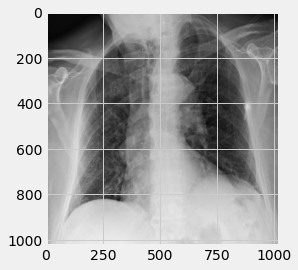

In [10]:
image = cv2.imread(imagePaths[0])
plt.imshow(image);

In [11]:
print(image.shape)

(1024, 1024, 3)


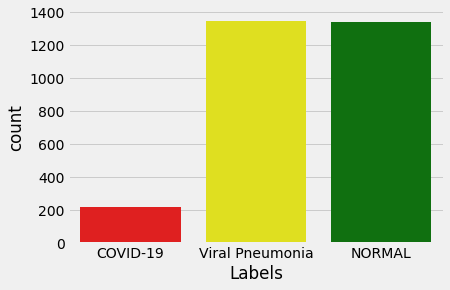

In [12]:
df = pd.DataFrame(y,columns=['Labels'])
sns.countplot(df['Labels'], palette=['red','yellow','green']);

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [14]:
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
y_encoded = np_utils.to_categorical(encoded_labels)

In [15]:
from sklearn.model_selection import train_test_split

#Generate training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, stratify=y_encoded, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2178, 224, 224, 3)
(2178, 3)
(727, 224, 224, 3)
(727, 3)


In [ ]:
Classification